In [1]:
from gen_ai_web_server import llm_client as llm_client
import logs
import numpy as np
import tqdm

GENERATE_SAMPLES = 100

def get_response(response):
    for r in response["response"]:
        if r['role'] == 'assistant':
            return r['content']
        
def score(response_text):
    return len(response_text)

client = llm_client.Client()
# print(client.send_request([{"role": "user","content":"How do you calculate pi?"}]))
# print(client.send_request_with_debug([{"role": "user","content":"How do you calculate pi?"}]))
# print(client.send_request_with_sampling_and_debug([{"role": "user","content":"How do you calculate pi?"}]))

core_instruction = "answer questions with the minimum amount of text"
question = "explain nuclear fusion?"
resp_samples = []
resp_scores = []
for i in tqdm.tqdm(range(GENERATE_SAMPLES)):
    resp = client.send_request([{"role": "user","content":question},{"role":"system", "content":core_instruction}], run_config={"do_sample":True})
    text = get_response(resp)
    resp_samples.append(text)
    resp_scores.append(score(text))
    

print(np.average(resp_scores), np.std(resp_scores))


100%|██████████| 100/100 [36:30:45<00:00, 1314.45s/it]   

1374.62 422.2052292428411


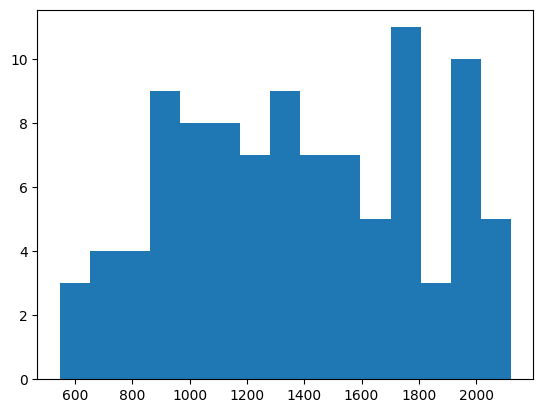

In [7]:
from matplotlib import pyplot as plt
plt.hist(resp_scores, bins=15)
plt.show()

In [3]:
with open("nucl_fusion_samples.txt", "w", encoding="utf-16") as f:
    for t in resp_samples:
        f.write(t + "\n+\n+\n", )



In [4]:
question = "explain nuclear fusion?"


resp_analysis = []
with open("nucl_fusion_samples_review_2.txt", "w", encoding="utf-16") as f:
    for i in tqdm.tqdm(range(GENERATE_SAMPLES)):
        answer = resp_samples[i]
        core_instruction = f"The question was {question}. Answer provided:{answer}."
        resp = client.send_request([{"role": "user","content":f"{core_instruction}"}, {"role":"system", "content":"Score the answers between 0 and 10 based on length (smaller is better) and completeness of information (more the better). Only share the score."}], run_config={"do_sample":False})
        text = get_response(resp)
        resp_analysis.append(text)
        f.write(text + "\n+\n+\n" )
        f.flush()
    

100%|██████████| 100/100 [07:53<00:00,  4.74s/it]
